## **Priyatham Susarla**

## **Task-2: Prediction Using Unsupervised ML**

## Importing Pre-Required Libraries

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset and Data Cleaning

In [ ]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.head() #diplay the fisrt 5 dataset.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
X= df.iloc[:, [0,1,2,3]].values

## Data Visualisation

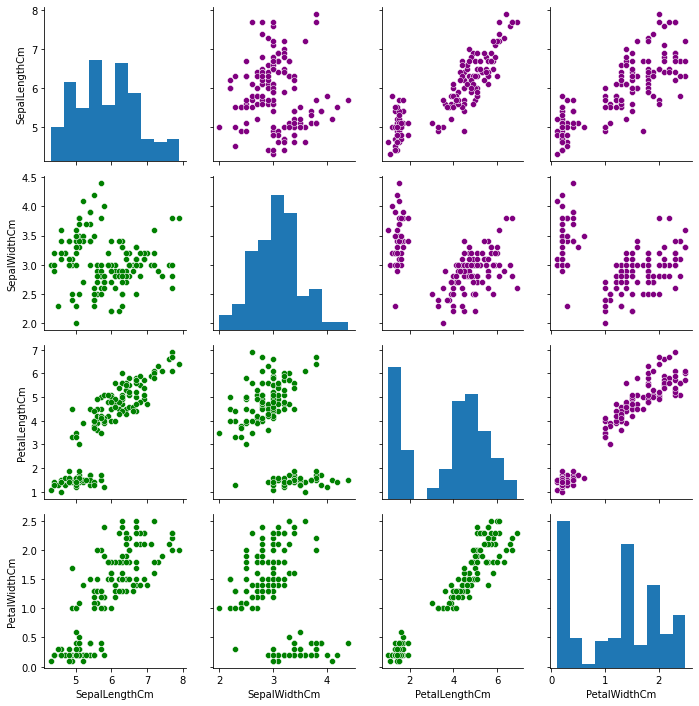

In [ ]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

In [ ]:
from sklearn import datasets
#labels of the dataset
iris=datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
s = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    s.append(km.inertia_)

In [ ]:
print(s)

[663.895238095238, 151.77145833333336, 77.91989035087718, 56.64237065018315, 45.83375000000001, 38.380978808131445, 34.011483645983645, 29.75801580972634, 27.730401211361738, 25.889508189179246]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


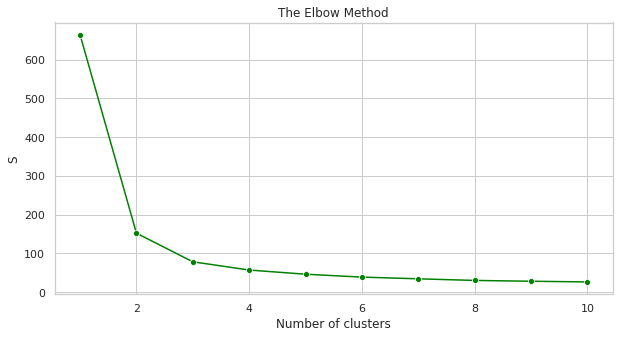

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), s,marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('S')
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K based on the rate of decrease in WCSS and we can see that after 3 the drop in s is minimal.

## Model Creation

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]


In [ ]:
centers = kmeans.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.01041667 3.43125    1.4625     0.25      ]
 [5.90327869 2.74918033 4.38196721 1.42622951]]


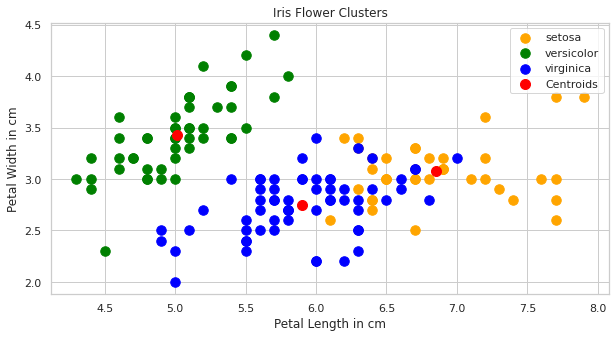

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 90, c = 'orange', label = 'setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 90, c = 'green', label = 'versicolor')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 90, c = 'blue', label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.show()